In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(37)

In [2]:
import itertools

indexes = list(itertools.product([0,1,2,3,4,5,6,7],[0,1,2],[0,1,2]))
print(indexes)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 2, 0), (4, 2, 1), (4, 2, 2), (5, 0, 0), (5, 0, 1), (5, 0, 2), (5, 1, 0), (5, 1, 1), (5, 1, 2), (5, 2, 0), (5, 2, 1), (5, 2, 2), (6, 0, 0), (6, 0, 1), (6, 0, 2), (6, 1, 0), (6, 1, 1), (6, 1, 2), (6, 2, 0), (6, 2, 1), (6, 2, 2), (7, 0, 0), (7, 0, 1), (7, 0, 2), (7, 1, 0), (7, 1, 1), (7, 1, 2), (7, 2, 0), (7, 2, 1), (7, 2, 2)]


In [3]:
def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

In [4]:
def get_F(h, s, v):
    h_norm = normalize(
        h,
        {'actual': {'lower': 0, 'upper': 179}, 'desired': {'lower': 0, 'upper': 360}}
    )
    s_norm = normalize(
        s,
        {'actual': {'lower': 0, 'upper': 255}, 'desired': {'lower': 0, 'upper': 1}}
    )
    v_norm = normalize(
        v,
        {'actual': {'lower': 0, 'upper': 255}, 'desired': {'lower': 0, 'upper': 1}}
    )
    
    h_norm = np.array(h_norm).flatten()
    s_norm = np.array(s_norm).flatten()
    v_norm = np.array(v_norm).flatten()
    
    h_d = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
    s_d = {0:0, 1:0, 2:0}
    v_d = {0:0, 1:0, 2:0}

    for i in range(len(h_norm)):
        H = h_norm[i]
        ha = None
        if H >= 316 or H <= 20:
            ha = 0
        elif H >= 21 and H <= 40:
            ha = 1
        elif H >= 41 and H <= 75:
            ha = 2
        elif H >= 76 and H <= 155:
            ha = 3
        elif H >= 156 and H <= 190:
            ha = 4
        elif H >= 191 and H <= 270:
            ha = 5
        elif H >= 271 and H <= 295:
            ha = 6
        elif H >= 296 and H <= 315:
            ha = 7
        if ha not in h_d:
            h_d[ha] = 1
        else:
            h_d[ha] += 1

    for i in range(len(s_norm)):
        S = s_norm[i]
        sa = None
        if S >= 0 and S <= 0.2:
            sa = 0
        elif S > 0.2 and S <= 0.7:
            sa = 1
        elif S > 0.7 and S <= 1:
            sa = 2
        if sa not in s_d:
            s_d[sa] = 1
        else:
            s_d[sa] += 1

    for i in range(len(v_norm)):
        V = v_norm[i]
        va = None
        if V >= 0 and V <= 0.2:
            va = 0
        elif V > 0.2 and V <= 0.7:
            va = 1
        elif V > 0.7 and V <= 1:
            va = 2
        if va not in v_d:
            v_d[va] = 1
        else:
            v_d[va] += 1
            
    F = np.zeros((72,))
    
    for i in range(8):
        for j in range(3):
            for k in range(3):
                F[indexes.index((i, j, k))] = 9*h_d[i] + 3*s_d[j] + v_d[k]
    return F

In [5]:
data_dir_path = "C:\\Users\\Souvik\\Desktop\\Base Paper\\"

In [6]:
import os
from os import listdir

colour_features = []
count = 0

import cv2
vidcap = cv2.VideoCapture(data_dir_path+'Video3.mpg')
success, img = vidcap.read()

#print(success)

count = 0
while success:
    #cv2.imwrite(out_path+"frame%d.jpg" % count, image)     # save frame as JPEG file
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    F = get_F(h, s, v)
    #print(F)
    colour_features.append(F)
    if(count%50 == 0):
        print("{count} images done".format(count=count))
    success, img = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1


0 images done
50 images done
100 images done
150 images done
200 images done
250 images done
300 images done
350 images done
400 images done
450 images done
500 images done
550 images done
600 images done
650 images done
700 images done


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_i = 0
best_sc = -1

for i in range(3,21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(colour_features)
    sc = silhouette_score(colour_features, kmeans.labels_)
    if(sc > best_sc):
        best_i = i
        best_sc = sc
    print(i, silhouette_score(colour_features, kmeans.labels_))
    
kmeans = KMeans(n_clusters=best_i, random_state=0).fit(colour_features)
cents = kmeans.cluster_centers_

3 0.5926999688302133
4 0.5976919186072199
5 0.45667042908017863
6 0.4364741682788792
7 0.4299270566832377
8 0.45298316944604283
9 0.4555736004631747
10 0.4423961827539176
11 0.4256587904518077
12 0.40764850739096686
13 0.396491899886039
14 0.39461279345116124
15 0.38849319681833144
16 0.3914645224753865
17 0.39546589594621323
18 0.3903318142385943
19 0.3261881638525796
20 0.36439224657786345


In [9]:
print(len(colour_features), len(kmeans.labels_))

min_dict = {}
min_frame= {}
for i in range(len(kmeans.labels_)):
    t = np.linalg.norm(colour_features[i]-cents[kmeans.labels_[i]])
    if kmeans.labels_[i] not in min_dict:
        min_dict[kmeans.labels_[i]] = t
        min_frame[kmeans.labels_[i]] = i
    else:
        if(t < min_dict[kmeans.labels_[i]]):
            min_dict[kmeans.labels_[i]] = t
            min_frame[kmeans.labels_[i]] = i
            
print(min_frame)

706 706
{3: 89, 2: 649, 1: 266, 0: 492}


Read a new frame:  True


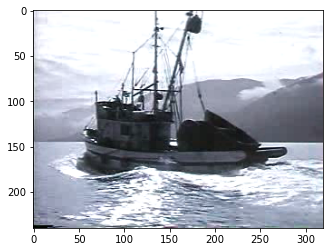

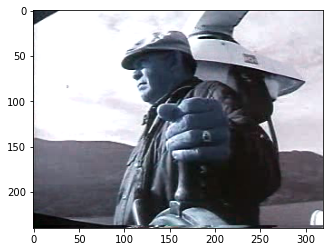

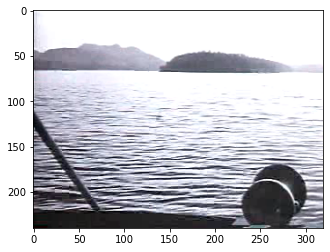

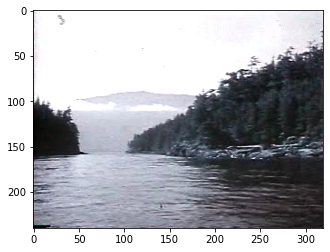

In [11]:
key_frames = list(min_frame.values())

count = 0

vidcap = cv2.VideoCapture(data_dir_path+'Video3.mpg')
success, img = vidcap.read()
print('Read a new frame: ', success)

while success:
    if count in key_frames:
        plt.imshow(img)
        plt.show()
    success, img = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1

In [12]:
key_frames = list(min_frame.values())
key_frames

[89, 649, 266, 492]